<a href="https://colab.research.google.com/github/johnatanDM/MachineLearning/blob/main/Alura_NPL_analise_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import WhitespaceTokenizer
import seaborn as sns

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!pip install wordcloud

In [4]:
from wordcloud import WordCloud

Baixar dataset do kaggle
https://www.kaggle.com/luisfredgs/imdb-ptbr

e renomear para dados.csv (esse passo é opcional, mas caso não seguido deve-se alterar o nome do arquivo no comando a seguir)

In [5]:
resenhas = pd.read_csv('dados.csv')
resenhas.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [6]:
resenhas.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [7]:
classificacao = resenhas.replace(['neg', 'pos'], [0,1])
print(classificacao)
resenhas['classificacao'] = classificacao.sentiment

          id  ... sentiment
0          1  ...         0
1          2  ...         0
2          3  ...         0
3          4  ...         0
4          5  ...         0
...      ...  ...       ...
49454  49456  ...         1
49455  49457  ...         1
49456  49458  ...         1
49457  49459  ...         1
49458  49460  ...         1

[49459 rows x 4 columns]


In [8]:
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [9]:
X_treino, X_teste, y_treino, y_teste = train_test_split(resenhas['text_pt'], resenhas['classificacao'], random_state = 42)

In [10]:
print("X Treino: ", X_treino.shape)
print("X Teste: ", X_teste.shape)
print("y Treino: ", y_treino.shape)
print("X Teste: ", y_teste.shape)

X Treino:  (37094,)
X Teste:  (12365,)
y Treino:  (37094,)
X Teste:  (12365,)


Vetorizar os dados. Começando com dados fictícios

In [11]:
dados_ficticios = ["Assisti um filme ótimo", "Assiti um filme péssimo"]

In [12]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(dados_ficticios)
bag_of_words

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [13]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [14]:
print(matriz_esparsa)

   Assisti  Assiti  filme  péssimo  um  ótimo
0        1       0      1        0   1      1
1        0       1      1        1   1      0


Aplicando nos dados reais

In [15]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenhas.text_pt)

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

print(matriz_esparsa.shape)

(49459, 50)


In [16]:
X_treino, X_teste, y_treino, y_teste = train_test_split(matriz_esparsa, resenhas['classificacao'], random_state = 42)

In [17]:
regressao_logistica = LogisticRegression(random_state=42)
regressao_logistica.fit(X_treino, y_treino)
print(regressao_logistica.score(X_teste, y_teste))

0.6583097452486858


In [18]:
def classificador(dados, coluna, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(dados[coluna])
  matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

  X_treino, X_teste, y_treino, y_teste = train_test_split(matriz_esparsa, dados[coluna_classificacao], random_state = 42)

  regressao_logistica = LogisticRegression(random_state=42)
  regressao_logistica.fit(X_treino, y_treino)
  return regressao_logistica.score(X_teste, y_teste)


In [19]:
classificacao = classificador(resenhas, "text_pt", "classificacao")
print(classificacao)

0.6583097452486858


List com todas as palavras

In [20]:
todas_palavras = " ".join([palavras for palavras in resenhas.text_pt])
len(todas_palavras)

63448424

In [21]:
nuvem_palavras = WordCloud(width=800, height=500, 
                           max_font_size=110, 
                           collocations=False).generate(todas_palavras)

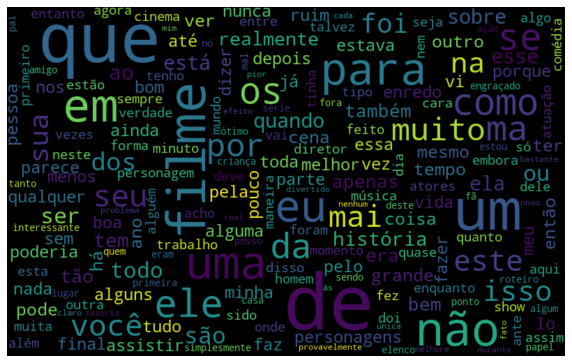

In [22]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

Separar positivo de negativo

In [23]:
negativos = resenhas.query('classificacao == 0')
negativos

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
37113,37115,"Towards the end of the movie, I felt it was to...","No final do filme, senti que era muito técnico...",neg,0
37114,37116,This is the kind of movie that my enemies cont...,Este é o tipo de filme que meus inimigos me as...,neg,0
37115,37117,I saw Descent last night at the Stockholm Film...,Eu vi Descent na noite passada no Stockholm Fi...,neg,0
37116,37118,Some films that you pick up for a pound turn o...,Alguns filmes que você escolhe por um quilo sã...,neg,0


In [24]:
def nuvem_neg(dados, coluna):
  negativos = dados.query('classificacao == 0')
  todas_palavras = " ".join([palavras for palavras in negativos.text_pt])
  nuvem_palavras = WordCloud(width=800, height=500, 
                           max_font_size=110, 
                           collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [25]:
def nuvem_pos(dados, coluna):
  positivos = dados.query('classificacao == 1')
  todas_palavras = " ".join([palavras for palavras in positivos.text_pt])
  nuvem_palavras = WordCloud(width=800, height=500, 
                           max_font_size=110, 
                           collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

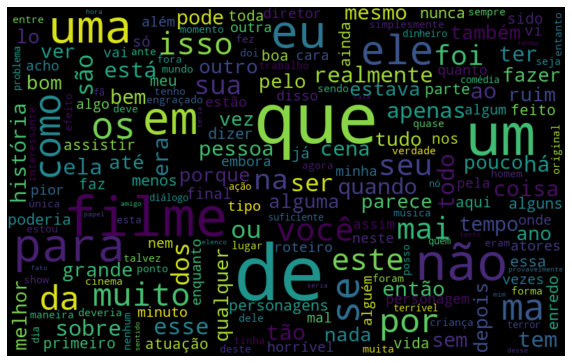

In [26]:
nuvem_neg(resenhas, 'text_pt')

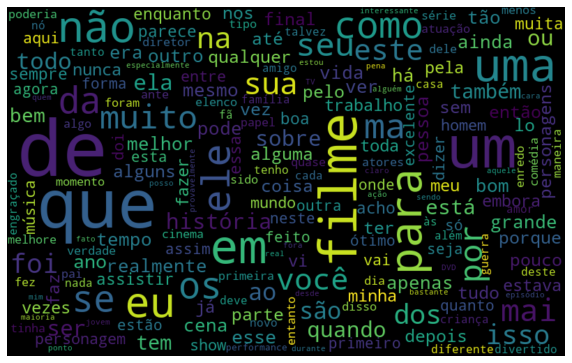

In [27]:
nuvem_pos(resenhas, 'text_pt')

Criando e contando os tokens

In [28]:
tokenizador = WhitespaceTokenizer()
tokens = tokenizador.tokenize(todas_palavras)
print(tokens)

frequencia = nltk.FreqDist(tokens)
frequencia

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



FreqDist({'Mais': 1538,
          'uma': 130888,
          'vez,': 1927,
          'o': 244881,
          'Sr.': 1741,
          'Costner': 50,
          'arrumou': 3,
          'um': 216410,
          'filme': 117543,
          'por': 61339,
          'muito': 51761,
          'mais': 53504,
          'tempo': 10424,
          'do': 101737,
          'que': 325070,
          'necessário.': 135,
          'Além': 3631,
          'das': 16496,
          'terríveis': 576,
          'seqüências': 586,
          'de': 417651,
          'resgate': 152,
          'no': 57145,
          'mar,': 63,
          'quais': 1537,
          'há': 15824,
          'poucas,': 7,
          'eu': 68814,
          'simplesmente': 6436,
          'não': 127915,
          'me': 19136,
          'importei': 109,
          'com': 99174,
          'nenhum': 4531,
          'dos': 41222,
          'personagens.': 1027,
          'A': 31547,
          'maioria': 5565,
          'nós': 3944,
          'tem': 2498

In [29]:
tokens_df = pd.DataFrame({'Palavras' : list(frequencia.keys()), 'Frequencia' : list(frequencia.values())})
tokens_df.nlargest(10, 'Frequencia')

,Palavras,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


Visualizando a frequencia

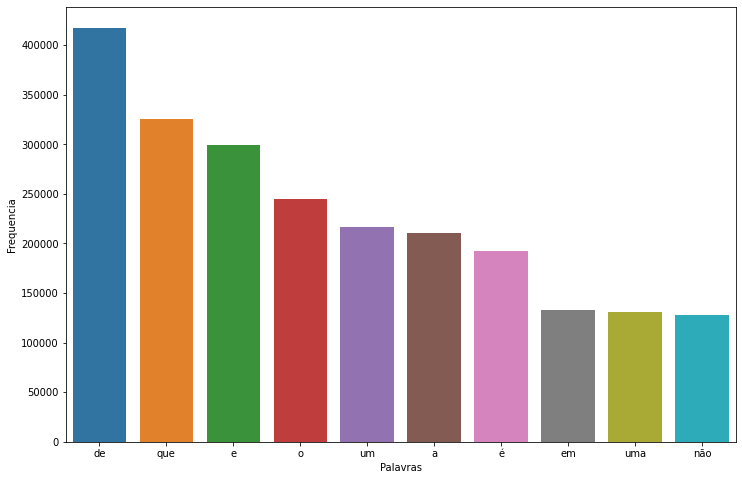

In [30]:
plt.figure(figsize = (12,8))
top10 = tokens_df.nlargest(10, 'Frequencia')

ax = sns.barplot(x='Palavras', y='Frequencia', data=top10)

In [37]:
def pareto(dados, coluna):
  todas_palavras = " ".join([palavras for palavras in dados[coluna]])
  tokenizador = WhitespaceTokenizer()
  tokens = tokenizador.tokenize(todas_palavras)
  
  frequencia = nltk.FreqDist(tokens)

  tokens_df = pd.DataFrame({'Palavras' : list(frequencia.keys()), 'Frequencia' : list(frequencia.values())})
  top10 = tokens_df.nlargest(10, 'Frequencia')

  plt.figure(figsize = (12,8))

  ax = sns.barplot(x='Palavras', y='Frequencia', data=top10)

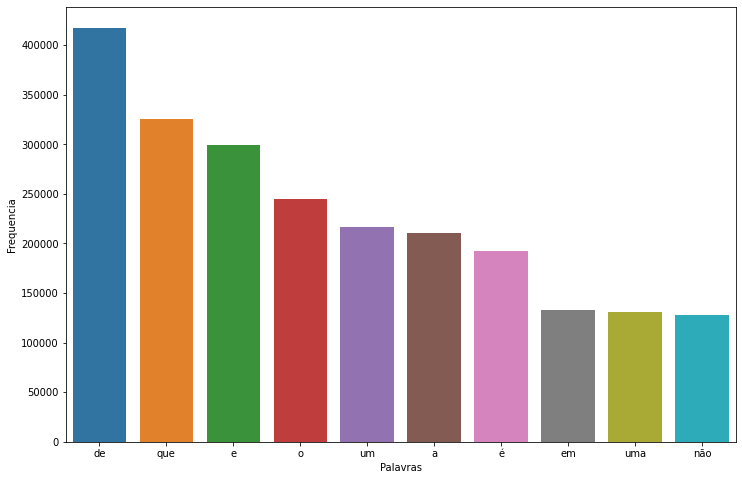

In [38]:
pareto(resenhas, 'text_pt')

Stopwords do NLTK

In [33]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [34]:
frases_processadas = []
tokenizador = WhitespaceTokenizer()
for frase in resenhas.text_pt:
  tokens = tokenizador.tokenize(frase)
  nova_frase = list()
  for palavra in tokens:
    if palavra not in stopwords:
      nova_frase.append(palavra)
  frases_processadas.append(" ".join(nova_frase))
resenhas["frases_processadas1"] = frases_processadas
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,frases_processadas1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [35]:
classificacao = classificador(resenhas, "frases_processadas1", "classificacao")
print(classificacao)

0.6607359482410028


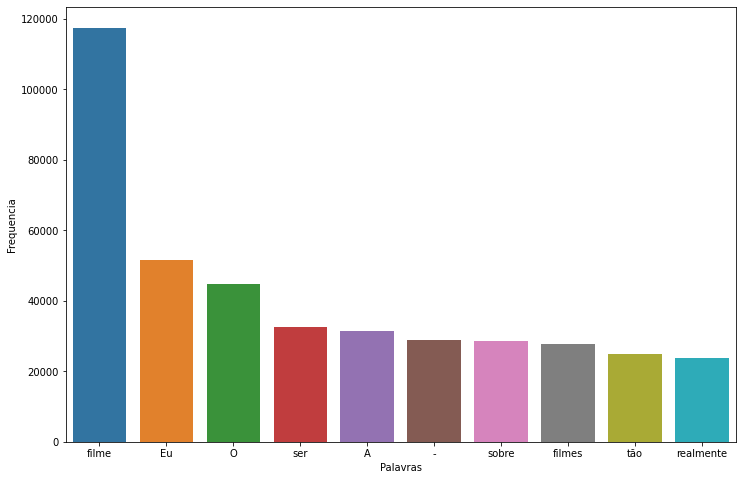

In [39]:
pareto(resenhas, 'frases_processadas1')